In [ ]:

import sys

command_str = f'{sys.executable} -m pip install --upgrade speedtest-cli'
print(command_str)
!{command_str}

In [1]:

import speedtest

print(['speedtest.{}'.format(fn) for fn in dir(speedtest) if not fn.startswith('_')])

['speedtest.ARG_SUPPRESS', 'speedtest.AbstractHTTPHandler', 'speedtest.ArgParser', 'speedtest.BadStatusLine', 'speedtest.BytesIO', 'speedtest.CERT_ERROR', 'speedtest.ConfigRetrievalError', 'speedtest.DEBUG', 'speedtest.ET', 'speedtest.FakeShutdownEvent', 'speedtest.FakeSocket', 'speedtest.FileIO', 'speedtest.GZIP_BASE', 'speedtest.GzipDecodedResponse', 'speedtest.HTTPConnection', 'speedtest.HTTPDefaultErrorHandler', 'speedtest.HTTPDownloader', 'speedtest.HTTPError', 'speedtest.HTTPErrorProcessor', 'speedtest.HTTPRedirectHandler', 'speedtest.HTTPSConnection', 'speedtest.HTTPUploader', 'speedtest.HTTPUploaderData', 'speedtest.HTTP_ERRORS', 'speedtest.InvalidServerIDType', 'speedtest.InvalidSpeedtestMiniServer', 'speedtest.NoMatchedServers', 'speedtest.OpenerDirector', 'speedtest.PARSER_TYPE_FLOAT', 'speedtest.PARSER_TYPE_INT', 'speedtest.PARSER_TYPE_STR', 'speedtest.PY25PLUS', 'speedtest.PY26PLUS', 'speedtest.PY32PLUS', 'speedtest.ProxyHandler', 'speedtest.Queue', 'speedtest.Request', 's

In [2]:

test = speedtest.Speedtest()
print(['test.{}'.format(fn) for fn in dir(test) if not fn.startswith('_')])

['test.best', 'test.closest', 'test.config', 'test.download', 'test.get_best_server', 'test.get_closest_servers', 'test.get_config', 'test.get_servers', 'test.lat_lon', 'test.results', 'test.servers', 'test.set_mini_server', 'test.upload']


In [17]:

upload_kbps = test.upload()
download_kbps = test.download()
SpeedtestResults_obj = test.results
print(['SpeedtestResults_obj.{}'.format(fn) for fn in dir(SpeedtestResults_obj) if not fn.startswith('_')])

['SpeedtestResults_obj.bytes_received', 'SpeedtestResults_obj.bytes_sent', 'SpeedtestResults_obj.client', 'SpeedtestResults_obj.csv', 'SpeedtestResults_obj.csv_header', 'SpeedtestResults_obj.dict', 'SpeedtestResults_obj.download', 'SpeedtestResults_obj.json', 'SpeedtestResults_obj.ping', 'SpeedtestResults_obj.server', 'SpeedtestResults_obj.share', 'SpeedtestResults_obj.timestamp', 'SpeedtestResults_obj.upload']


In [30]:

%run ../load_magic/storage.py

s = Storage()
file_path = os.path.join(s.data_csv_folder, 'speedtest_log.csv')
with open(file_path, 'a') as f:
    print(SpeedtestResults_obj.csv(), file=f)

In [35]:

dir_path = os.path.abspath(osp.join('..', 'py'))
print(f"""
# cd {dir_path}
# {sys.executable} speedtest.net_results.py""")


# cd C:\Users\dev\Documents\Repositories\notebooks\py
# C:\Users\dev\anaconda3\python.exe speedtest.net_results.py


In [21]:

import pandas as pd

columns_list = SpeedtestResults_obj.csv_header().split(',')
rows_list = [SpeedtestResults_obj.dict()]
pd.DataFrame(rows_list, columns=columns_list)

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload,Share,IP Address
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:

%run ../load_magic/lists.py

check_for_typos(columns_list, SpeedtestResults_obj.dict().keys(), verbose=False)

,left_item,right_item,max_similarity
0,Server ID,server,0.666667
1,Sponsor,download,0.400000
2,Server Name,server,0.588235
3,Timestamp,timestamp,0.888889
4,Distance,timestamp,0.470588
5,Ping,ping,0.750000
6,Download,download,0.875000
7,Upload,upload,0.833333
8,Share,share,0.800000
9,IP Address,bytes_sent,0.300000


In [26]:

{key: value for key, value in zip(columns_list, SpeedtestResults_obj.csv().split(','))}

{'Server ID': '37807',
 'Sponsor': '"LightWave Networks',
 'Server Name': ' Inc"',
 'Timestamp': '"Needham',
 'Distance': ' MA"',
 'Ping': '2020-11-27T11:41:11.765879Z',
 'Download': '52.709306922939035',
 'Upload': '36.746',
 'Share': '74400693.51912855',
 'IP Address': '5031777.26585419'}

In [38]:

test.upload()

6051203.623742485

In [36]:

test.set_mini_server?

Signature: test.set_mini_server(server)
Docstring:
Instead of querying for a list of servers, set a link to a
speedtest mini server
File:      c:\users\dev\anaconda3\lib\site-packages\speedtest_cli-2.1.2-py3.7.egg\speedtest.py
Type:      method


In [35]:

servers_dict = test.servers

In [31]:

lat_lon_tuple = test.lat_lon

In [29]:

servers_dict = test.get_servers()

In [26]:

config_dict = test.get_config()

In [23]:

server_dict_list = test.get_closest_servers()

In [9]:

test.get_best_server()

{'url': 'http://stosat-ndhm-01.sys.comcast.net:8080/speedtest/upload.php',
 'lat': '42.3578',
 'lon': '-71.0617',
 'name': 'Boston, MA',
 'country': 'United States',
 'cc': 'US',
 'sponsor': 'Comcast',
 'id': '1774',
 'host': 'stosat-ndhm-01.sys.comcast.net:8080',
 'd': 60.26028292943249,
 'latency': 18.918}

In [20]:

test.download()

113941927.80793376

In [18]:

config_dict = test.config
config_dict['client']

{'ip': '24.91.86.222',
 'lat': '42.5884',
 'lon': '-71.7266',
 'isp': 'Comcast Cable',
 'isprating': '3.7',
 'rating': '0',
 'ispdlavg': '0',
 'ispulavg': '0',
 'loggedin': '0',
 'country': 'US'}

In [14]:

server_dict_list = test.closest

In [15]:

server_dict = test.best

In [1]:

%run ../../load_magic/environment.py
%run ../../load_magic/charts.py
notebook_path = get_notebook_path()
print(notebook_path)
from PIL import Image
import sys
import os
import pylab
import imageio
import numpy as np
from IPython.display import Image

mp4_dir = os.path.join(s.saves_folder, 'mp4')
gif_dir = os.path.join(s.saves_folder, 'gif')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\ipynb\Speedtest.net Exploration.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'FACEBOOK_ASPECT_RATIO', 'Image', 'In', 'Out', 'RandomForestClassifier', 'Storage', 'TWITTER_ASPECT_RATIO', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'ball_and_chain', 'colormaps_list', 'csv', 'cycler', 'exit', 'first_order_linear_scatterplot', 'get_classifier', 'get_color_cycler', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_inf_nan_mask', 'get_input_sample', 'get_ipython', 'get_module_version', 'get_modules_dataframe', 'get_notebook_path', 'get_struct_name', 'gif_dir', 'imageio', 'ipykernel', 'json', 'jupyter_config_dir', 'mp4_dir', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pearsonr', 'pickle', 'plt', 'preprocess_data', 'pylab', 'quit', 'r', 'random', 're', 's', 'save_fig_as_various', 'set_matplotlib_formats', 'sns', 'subprocess', 'sys', 'urllib']

In [2]:

file_path = os.path.join(s.data_csv_folder, 'speedtest_log.csv')
!"C:\Program Files (x86)\Microsoft Office\root\Office16\EXCEL.EXE" {os.path.abspath(file_path)}

In [3]:

speedtest_log_df = pd.read_csv(file_path)
speedtest_log_df['Timestamp'] = pd.to_datetime(speedtest_log_df.Timestamp, errors='coerce')
column_name = 'State'
speedtest_log_df[column_name] = speedtest_log_df['Server Name'].map(lambda x: str(x).split(' ')[-1])
column_series = speedtest_log_df[column_name]
states_list = column_series.value_counts().index.tolist()
color_cycler = get_color_cycler(len(states_list))
color_dict = {}
for state_abbrev, face_color_dict in zip(states_list, color_cycler()):
    face_color = face_color_dict['color'].reshape((1, -1))
    color_dict[state_abbrev] = face_color
speedtest_log_df['Color'] = speedtest_log_df[column_name].map(lambda x: color_dict[x])
speedtest_log_df.shape

(8184, 12)

In [16]:

import matplotlib.dates as mdates

fig_width = 18
fig_height = fig_width/TWITTER_ASPECT_RATIO

months = mdates.MonthLocator()
months_format = mdates.DateFormatter('%B')

column_name = 'State'
grouped = speedtest_log_df.groupby(column_name)

In [17]:

x_label = 'Timestamp'
y_label = 'Download Speed'
x_min = speedtest_log_df[x_label].min()
x_max = speedtest_log_df[x_label].max()
y_min = speedtest_log_df[y_label.split(' ')[0]].min()
y_max = speedtest_log_df[y_label.split(' ')[0]].max()

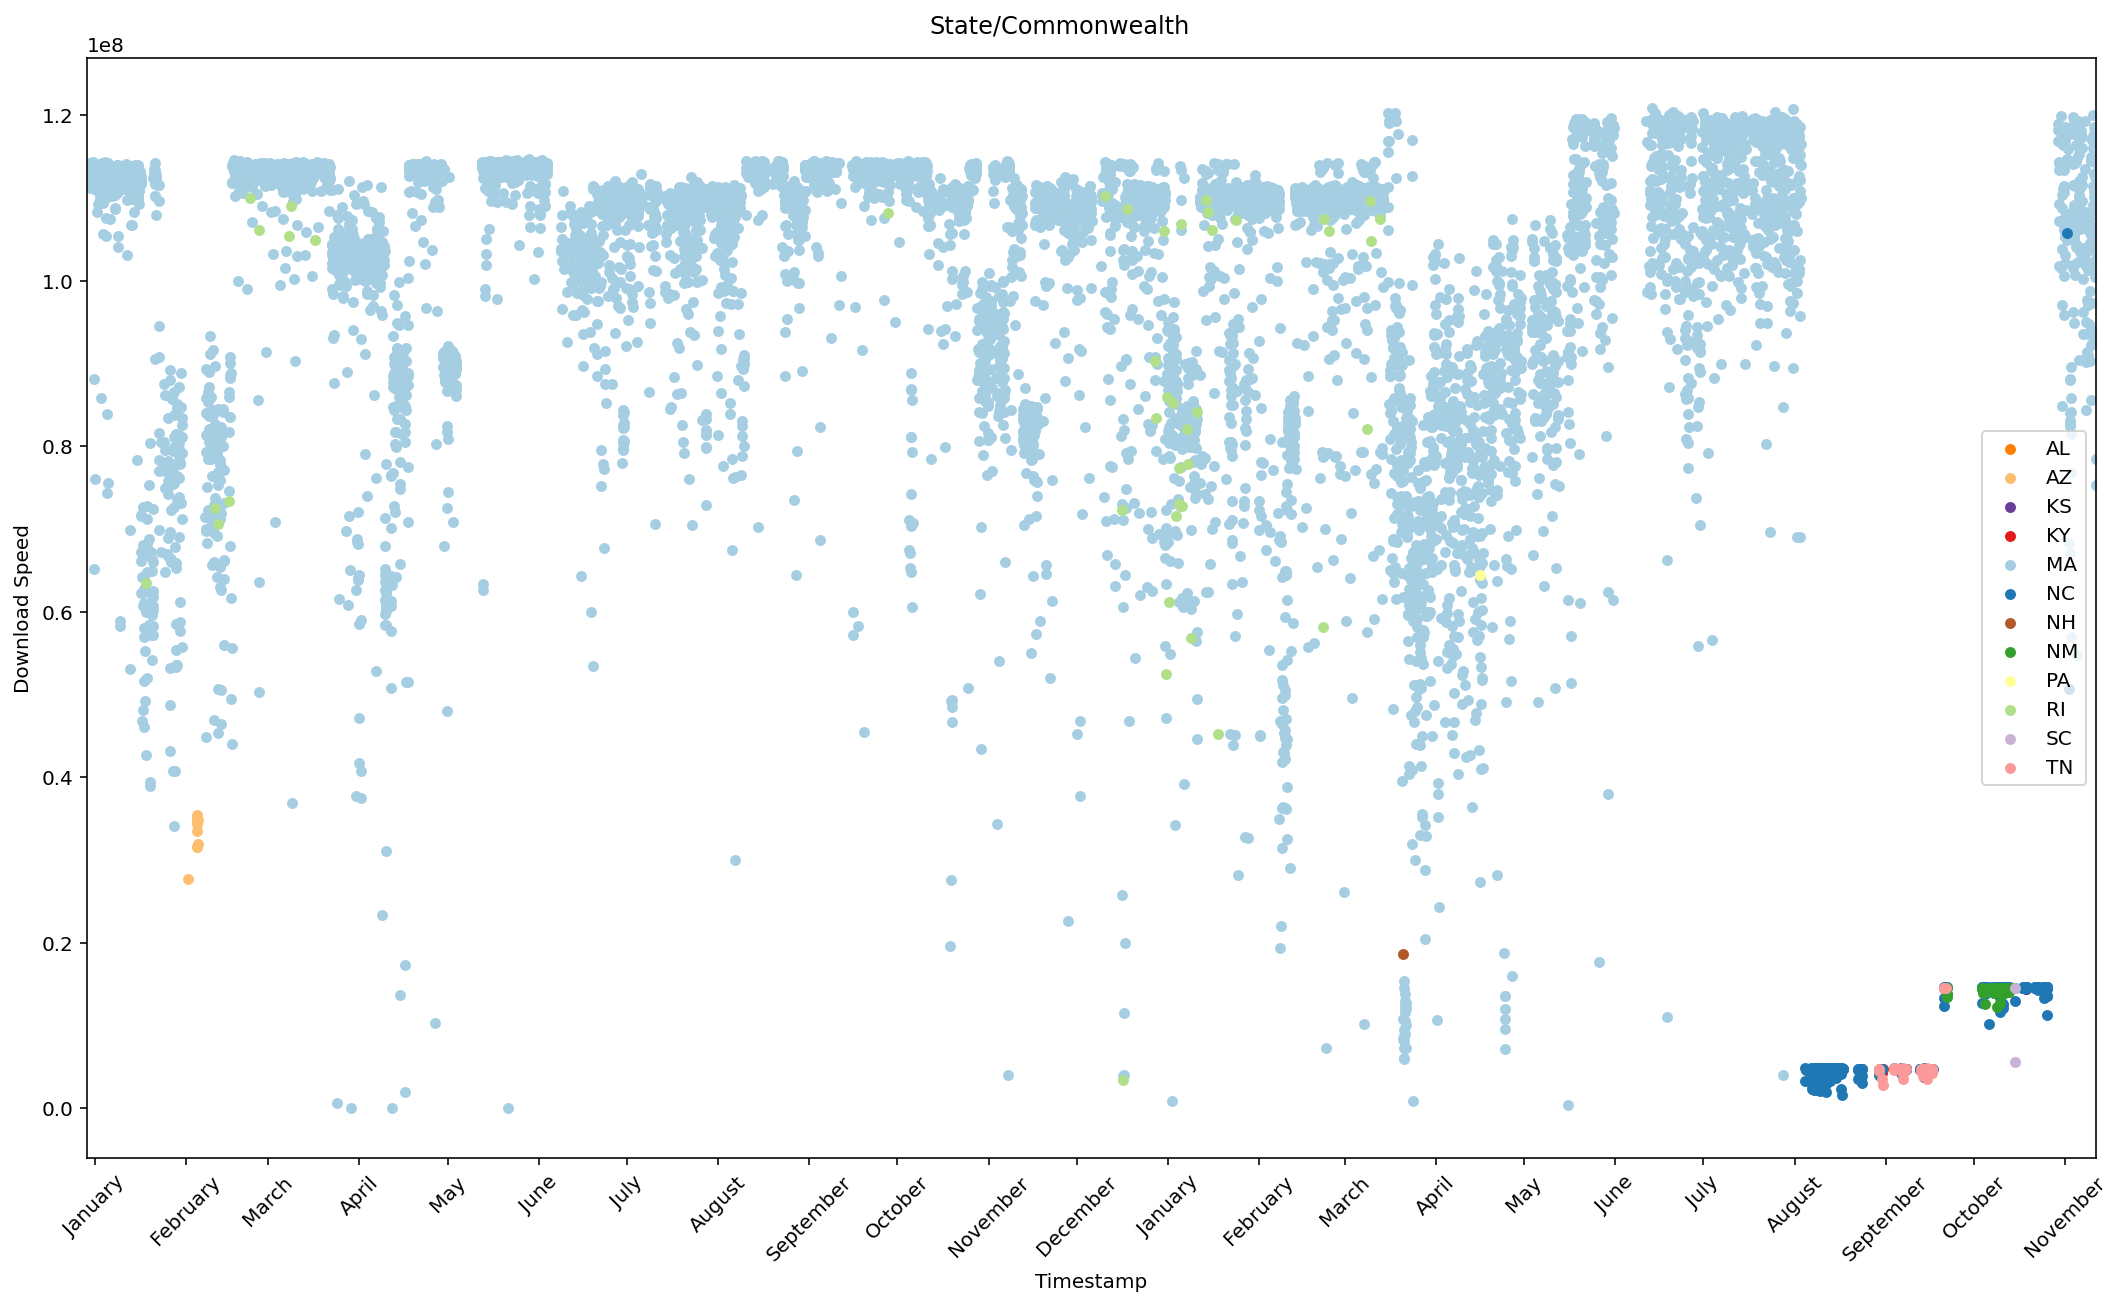

In [18]:

fig = plt.figure(figsize=(fig_width, fig_height))
ax = plt.axes()

# Format the x ticks
ax.xaxis_date()
xaxis = ax.xaxis
xaxis.set_major_locator(months)
xaxis.set_major_formatter(months_format)
ax.set_xlim(left=x_min, right=x_max)
xlabel_text = plt.xlabel(x_label)

# Pick the y scale
plt.yscale('linear')

for state_abbrev, group in grouped:
    group.plot(ax=ax, kind='scatter', x=x_label, y=y_label.split(' ')[0], label=state_abbrev, color=color_dict[state_abbrev])
title_text = fig.suptitle(f'{column_name}/Commonwealth', x=0.5, y=0.91)
xticks_tuple = plt.xticks(rotation=45)
ylabel_text = plt.ylabel(y_label);


----

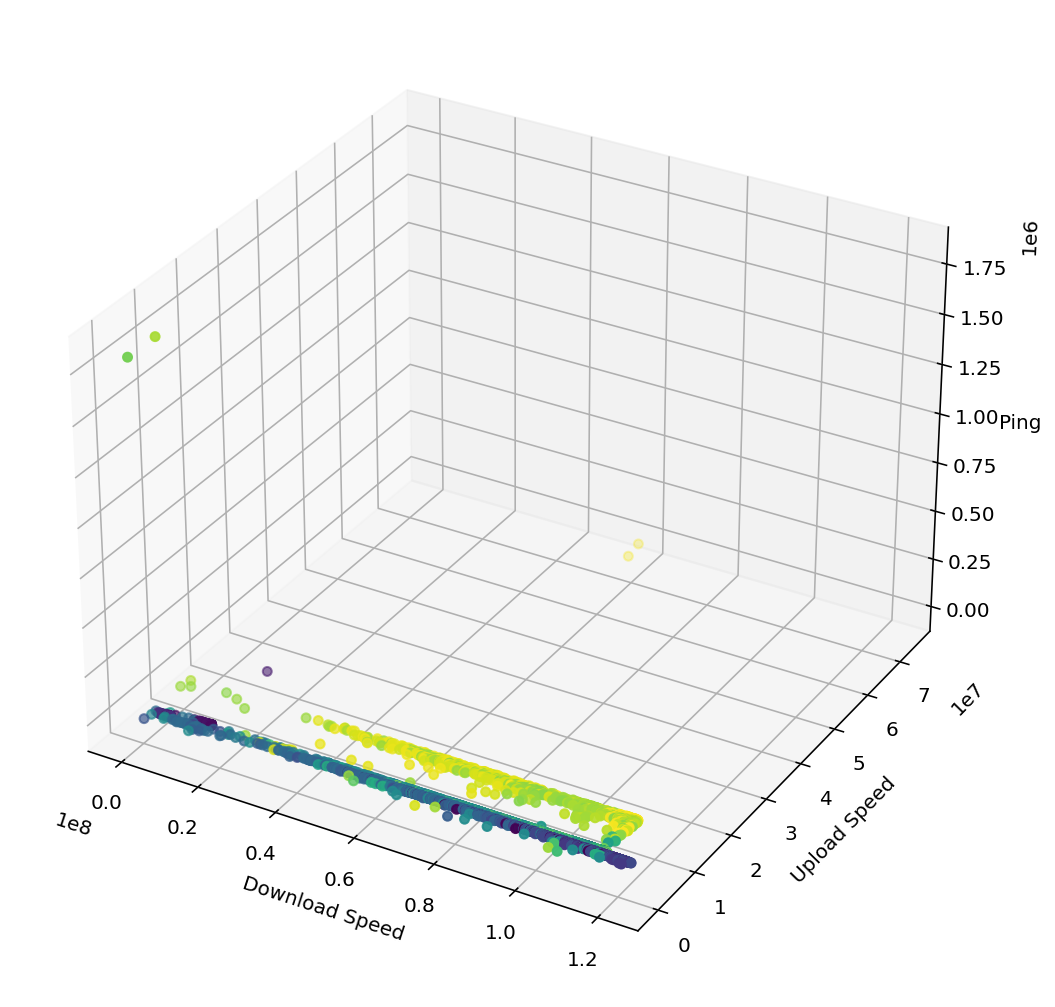

In [22]:

%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')


xdata = speedtest_log_df['Download'].values
ydata = speedtest_log_df['Upload'].values
zdata = speedtest_log_df['Ping'].values
tdata = speedtest_log_df['Timestamp'].values

fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')

path_3d_collection = ax.scatter3D(xdata, ydata, zdata, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')
zlabel_text = ax.set_zlabel('Ping')

In [ ]:

path_collection = plt.scatter(xdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')

In [ ]:

path_collection = plt.scatter(zdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Upload Speed')

In [ ]:

path_collection = plt.scatter(zdata, xdata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Download Speed')

In [ ]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

FACEBOOK_ASPECT_RATIO = 1.91
TWITTER_ASPECT_RATIO = 16/9
def plot_time_series(x, y, x_label, y_label):
    fig_width = 18
    fig_height = fig_width/TWITTER_ASPECT_RATIO
    fig = plt.figure(figsize=(fig_width, fig_height))
    #print([f'fig.{fn}' for fn in dir(fig) if 'tick' in fn.lower()])
    ax = plt.axes()
    #print([f'ax.{fn}' for fn in dir(ax) if 'tick' in fn.lower()])

    months = mdates.MonthLocator()
    months_format = mdates.DateFormatter('%B')
    days = mdates.DayLocator()
    days_format = mdates.DateFormatter('%m/%d')

    # Format the ticks
    ax.xaxis_date()
    xaxis = ax.xaxis
    #print([f'xaxis.{fn}' for fn in dir(xaxis) if 'tick' in fn.lower()])
    xaxis.set_major_locator(months)
    xaxis.set_major_formatter(months_format)
    #print([f'plt.{fn}' for fn in dir(plt) if 'tick' in fn.lower()])
    plt.xticks(rotation=45)
    
    # Pick the scale
    if y_label in ['Upload Speed', 'Ping']:
        plt.yscale('log')
    else:
        plt.yscale('linear')
    
    xlabel_text = plt.xlabel(x_label)
    ylabel_text = plt.ylabel(y_label)
    path_collection = ax.plot_date(x, y)

In [ ]:

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plot_time_series(tdata, xdata, 'Timestamp', 'Download Speed')

In [ ]:

plot_time_series(tdata, ydata, 'Timestamp', 'Upload Speed')

In [ ]:

plot_time_series(tdata, zdata, 'Timestamp', 'Ping')

In [ ]:

%matplotlib inline
def plot_time_series(column_name, y_label='Ping'):
    color_map = 'tab10'
    fig_width = 18
    fig_height = fig_width/TWITTER_ASPECT_RATIO
    fig = plt.figure(figsize=(fig_width, fig_height))
    ax = plt.axes()

    months = mdates.MonthLocator()
    months_format = mdates.DateFormatter('%B')
    days = mdates.DayLocator()
    days_format = mdates.DateFormatter('%m/%d')

    # Format the ticks
    ax.xaxis_date()
    xaxis = ax.xaxis
    xaxis.set_major_locator(months)
    xaxis.set_major_formatter(months_format)

    # Pick the scale
    x_label = 'Timestamp'
    if y_label in ['Upload Speed', 'Ping']:
        plt.yscale('log')
    else:
        plt.yscale('linear')

    xlabel_text = plt.xlabel(x_label)
    ylabel_text = plt.ylabel(y_label)
    column_series = speedtest_log_df[column_name]
    category_list = column_series.value_counts().head(5).index.tolist()
    color_cycler = get_color_cycler(len(category_list)+2)
    for category, face_color_dict in zip(category_list, color_cycler()):
        if category is 'Other':
            mask_series = ~speedtest_log_df[column_name].isin(category_list)
        else:
            mask_series = (speedtest_log_df[column_name] == category)
        df = speedtest_log_df[mask_series]
        face_color = face_color_dict['color'].reshape((1, -1))
        path_collection = group.plot(ax=ax, kind='scatter', x=x_label, y=y_label.split(' ')[0], label=category, color=face_color, alpha=0.5)
    xticks_tuple = plt.xticks(rotation=45)
    title_text = fig.suptitle(column_name, x=0.5, y=0.91);

In [ ]:

for column_name in ['Server ID', 'Sponsor', 'Server Name', 'Distance', 'IP Address']:
    plot_time_series(column_name, y_label='Download Speed')

In [ ]:

interval_obj = interval_list[0]
[f'interval_obj.{fn}' for fn in dir(interval_obj) if not fn.startswith('_')]

In [ ]:

import matplotlib

colors_list = list(reversed(list(matplotlib.colors.BASE_COLORS.keys())))
color_dict = {}
#color_cycler = get_color_cycler(len(interval_list))
for interval_obj in interval_list:
    color = colors_list.pop()
    color_dict[interval_obj] = color

In [ ]:

def get_interval(search_color):
    return_value = f'from {round(y_min, 0)} to {round(y_max, 0)} kms away'
    for interval_obj, interval_color in color_dict.items():
        if (interval_color==search_color):
            left = interval_obj.left
            right = interval_obj.right
            return_value = f'from {round(left, 0)} to {round(right, 0)} kms away'
            break
    
    return return_value
speedtest_log_df['Label'] = speedtest_log_df['Color'].map(get_interval)

In [ ]:

for search_color, group in grouped:
    print(search_color, group)
    break
[f'ax.{fn}' for fn in dir(ax) if 'lim' in fn.lower()]

In [ ]:

(x, y, c)

In [ ]:

for column_name in ['Server ID', 'Sponsor', 'Server Name', 'Distance', 'IP Address']:
    column_series = speedtest_log_df[column_name]
    print()
    print(column_name)
    if type(column_series.values[0]) is str:
        print(column_series.value_counts().head(5))
    else:
        print(column_series.value_counts(bins=5))

In [ ]:

import requests
%run ../../load_magic/soup.py

selector_css = 'body > main > table'
columns_list = ['Place Name', 'Latitude', 'Longitude']
latlongs_df = pd.DataFrame([], columns=columns_list)
for i in range(1, 10):
    if i == 1:
        url = 'https://www.latlong.net/category/cities-236-15.html'
    else:
        url = f'https://www.latlong.net/category/cities-236-15-{i}.html'
    try:
        page_soup = get_page_soup(url)
        tag_soup = page_soup.select_one(selector_css)
        df = pd.read_html(str(tag_soup))[0]
        latlongs_df = pd.concat([latlongs_df, df])
    except Exception as e:
        print(f'{url}: {str(e).strip()}')

In [ ]:

from math import sin, cos, sqrt, atan2, radians

def get_distance(lat1, lon1, lat2, lon2):
    
    # approximate radius of earth in km
    R = 6373.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [ ]:

import wikipedia

column_name = 'Server Name'
column_series = speedtest_log_df[column_name]
home_lat = 35.0025
home_lon = -78.328889
latlon_dict = {'Oxford, MA': (42.1168, 71.8648)}
distance_dict = {'Oxford, MA':get_distance(home_lat, home_lon, 42.1168, 71.8648) }
for place_name, _ in column_series.value_counts().iteritems():
    page_obj = wikipedia.page(title=place_name)
    try:
        latlong_tuple = page_obj.coordinates
        lat_float = round(float(latlong_tuple[0]), 6)
        lon_float = round(float(latlong_tuple[1]), 6)
        latlon_dict[place_name] = (lat_float, lon_float)
        distance = get_distance(home_lat, home_lon, lat_float, lon_float)
        distance_dict[place_name] = distance
        print(f'{place_name} ({distance}): {lat_float}, {lon_float}')
    except Exception as e:
        def f(x):

            return place_name in str(x)
        mask_series = latlongs_df['Place Name'].map(f)
        if mask_series.any():
            latlong_array = latlongs_df[mask_series].head(1).values[0]
            lat_float = round(float(latlong_array[1]), 6)
            lon_float = round(float(latlong_array[2]), 6)
            latlon_dict[place_name] = (lat_float, lon_float)
            distance = get_distance(home_lat, home_lon, lat_float, lon_float)
            print(f'{place_name} ({distance}): {lat_float}, {lon_float}')
        else:
            print(f'{place_name}: {str(e).strip()}')
            #break
    #print([f'page_obj.{fn}' for fn in dir(page_obj) if not fn.startswith('_')])

In [ ]:

def f(x):
    
    return distance_dict[str(x)]
speedtest_log_df['Distance'] = speedtest_log_df['Server Name'].map(f)

In [ ]:

speedtest_log_df

In [ ]:

[fn for fn in dir() if 'wiki' in fn.lower()]

In [ ]:

grouped = speedtest_log_df.groupby(column_name)
for (category, group), face_color_dict in zip(grouped, color_cycler()):
    face_color = face_color_dict['color']
    
    # Provide a 2-D array with a single row for the color
    if category not in category_list:
        category = 'Other'
    path_collection = group.plot(ax=ax, kind='scatter', x='Timestamp', y='Ping', label=category, color=face_color.reshape((1, -1)))

In [ ]:

[f'group.{fn}' for fn in dir(group) if 'date' in fn.lower()]

In [ ]:

group.plot?

In [ ]:

#column_series = speedtest_log_df[column_name]
#counts_series = column_series.value_counts(bins=5)
#interval_list = counts_series.index.tolist()
color_map = 'tab10'
days = mdates.DayLocator()
days_format = mdates.DateFormatter('%m/%d')

#x_values = speedtest_log_df[x_label].values
#y_values = speedtest_log_df[y_label.split(' ')[0]].values
#c_list = [get_color(d) for d in speedtest_log_df['Distance'].values]